# Problem 1 (Practice)

Consider the integral
\begin{align*}
  I = \int_0^2 \sin^2\left[\frac{1}{x(2-x)}\right] dx.
\end{align*}

(a) Write a program to evaluate the integral using the "hit-or-miss" Monte Carlo method with 100 sample points. Try the evaluation 1,000 times and print out the mean and standard deviation using np.mean and np.std. Considering that the true value of the integral is 1.4514015, what is the percentage error of the mean? (20 pts)

In [2]:
'''
Define integrand f(x) first. The domain is x = [0, 2] and y = [0, 1]. The true value of the integral is 1.4514015.
Print the mean and standard deviation of the estimated integral value and the percentage error of the mean.
During the iteration, we compute P = I/2 => I = 2P
'''

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(1 / (x * (2 - x)))**2

N = 100
iter = 1000
I = np.empty(iter)
true_value = 1.4514015

for i in range(iter):
    x = np.random.rand(N)*2
    y = np.random.rand(N)
    I[i] = 2 * np.mean(y < f(x))
    
print(np.mean(I), np.std(I))
print(np.abs(true_value - np.mean(I)) / true_value * 100)

1.45042 0.08745640971363963
0.06762429279561641


(b) Apply the same algorithm for $N=10^2,10^3,10^4,10^5$ with 1,000 iterations each. Plot the standard deviation as a function of $N$, in log-log scale. How does the standard deviation scale with $N$? Does this confirm your expectations of the scaling?

(40 pts)

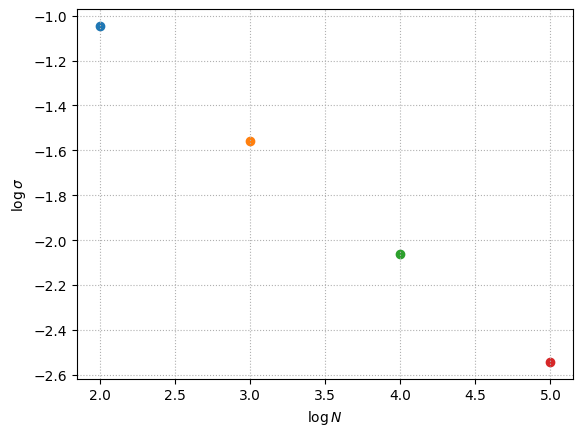

In [3]:
'''
Compute P = I/2 => I = 2P for each N with 1000 iterations
'''
for N in [int(1e2), int(1e3), int(1e4), int(1e5)]:
    for i in range(iter):
        x = np.random.rand(N)*2
        y = np.random.rand(N)
        I[i] = 2 * np.mean(y < f(x))
    plt.scatter(np.log10(N), np.log10(np.std(I)))
plt.xlabel('$\log N$')
plt.ylabel('$\log \sigma$')
plt.grid(True, which='both', ls=':')
plt.show()

(c) Now repeat (b) with the mean value method. Is it more or less precise than the hit-or-miss Monte Carlo method? Does the scaling change? (40 pts)

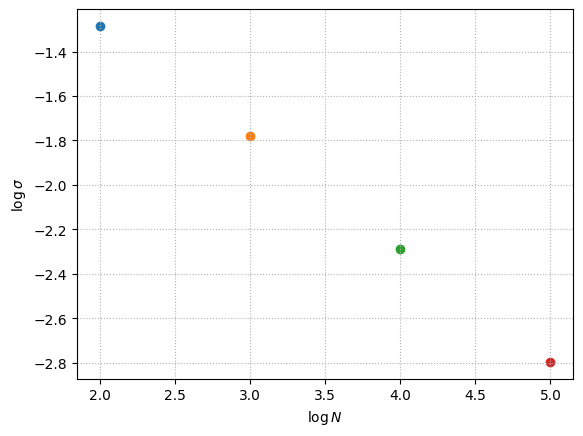

In [4]:
'''
Repeat the process with MV method and plot the results as loglog scale
'''
for N in [int(1e2), int(1e3), int(1e4), int(1e5)]:
    for i in range(iter):
        x = np.random.rand(N)*2
        I[i] = 2/N * np.sum(f(x))
    plt.scatter(np.log10(N), np.log10(np.std(I)))
plt.xlabel('$\log N$')
plt.ylabel('$\log \sigma$')
plt.grid(True, which='both', ls=':')
plt.show()

---
# Problem 2

Calculate a value for the integral
\begin{align*}
  I = \int_0^1 \frac{x^{-1/2}}{e^x+1}dx
\end{align*}
using the importance sampling formula in the lecture notes, as follows.

(a) Plot the integrand in the domain. Is there a divergence and where? (10 pts)

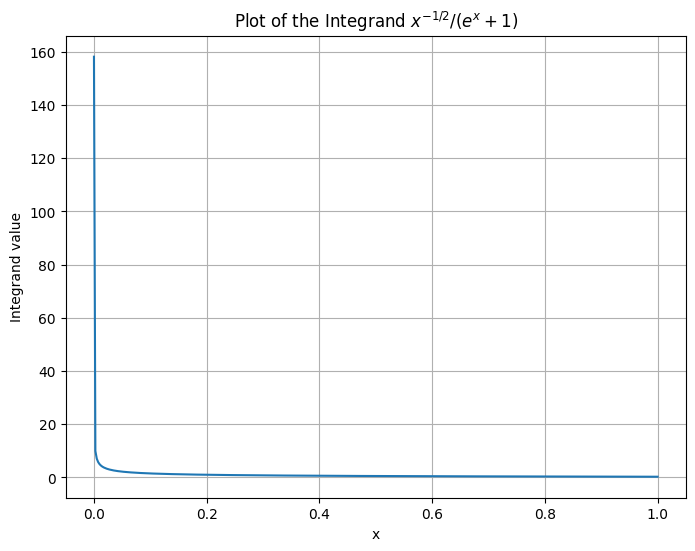

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def integrand(x):
    return x**(-0.5) / (np.exp(x) + 1)

x = np.linspace(1e-5, 1, 400)
y = integrand(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Integrand value')
plt.title('Plot of the Integrand $x^{-1/2} / (e^x+1)$')
plt.grid(True)
plt.show()

(b) Use the mean value method to evaluate the integral 10,000 times, for $N=100$. What is the mean and standard deviation, using np.mean and np.std (Run the entire code a couple of times and present a reasonable standard deviation). (20 pts)

In [17]:
N = 100
iterations = 10000
integral_estimates = np.empty(iterations)

for i in range(iterations):
    x_samples = np.random.rand(N)
    f_values = integrand(x_samples)
    # integral_estimates[i] = np.mean(f_values)
    integral_estimates[i] = 1/N *np.sum(f_values)

mean_val = np.mean(integral_estimates)
std_dev = np.std(integral_estimates)

print(f"Mean Value Method Results:")
print(f"Mean: {mean_val}")
print(f"Standard Deviation: {std_dev}")

Mean Value Method Results:
Mean: 0.8425466074983636
Standard Deviation: 0.20844578004135605


(c) Now let us use the importance sampling method to more correctly evaluate the integral. By inspection, the probability density function $p(x)=Ax^{-1/2}$ should be a good candidate. What is $A$? (10 pts)

(d) We want to sample from $p(x)$ given a uniformly distributed variable $\eta_i$ as $x_i = s(\eta_i)$. What is $s(\eta)$? (20 pts)

(e) Write a code the uses 100 random samples from $p(x)$ and use this to calculate $I$ 10,000 times, as in (b). What is the mean and the standard deviation? Is it better than the mean value method? (40 pts)

In [7]:
def w(x):
    return 2 / (np.exp(x) + 1)

N = 100
iterations = 10000
integral_estimates_is = np.empty(iterations)

for i in range(iterations):
    eta_samples = np.random.rand(N)
    x_samples_is = eta_samples**2
    integral_estimates_is[i] = np.mean(w(x_samples_is))

mean_val_is = np.mean(integral_estimates_is)
std_dev_is = np.std(integral_estimates_is)

print(f"Importance Sampling Method Results:")
print(f"Mean: {mean_val_is}")
print(f"Standard Deviation: {std_dev_is}")
print("\nComparison:")
print(f"The standard deviation with importance sampling ({std_dev_is:.6f})")
print(f"is significantly smaller than with the mean value method ({std_dev:.6f}).")
print("This shows that the importance sampling method is much better (more precise) for this integral.")


Importance Sampling Method Results:
Mean: 0.8390103409037843
Standard Deviation: 0.014126465215007416

Comparison:
The standard deviation with importance sampling (0.014126)
is significantly smaller than with the mean value method (0.159347).
This shows that the importance sampling method is much better (more precise) for this integral.
